### 청와대 국민청원 데이터에서 각 분류별 Top1 추출

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#출력 그림 크기 조절
sns.set(rc={'figure.figsize':(12,12)})
plt.style.use('ggplot')
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import warnings
warnings.filterwarnings("ignore")
import datetime as dt
### 세종사전 실행
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud
twitter = Twitter()

In [2]:
df = pd.read_csv("blue_text_0811_13000s.csv",encoding = 'cp949')
# df.Date = pd.to_datetime(df.Date)

In [3]:
for i in df.Class.unique():
    temp = df.loc[df.Class == i]
    temp = temp.loc[temp.Support == temp.Support.max()]
    display(temp)

,Num,Class,Title,Date,Support
0,454161,안전/환경,텔레그램 n번방 용의자 신상공개 및 포토라인 세워주세요,2020-04-17,2715626


,Num,Class,Title,Date,Support
2,454159,정치개혁,자유 한국당 정당해산 청원,2019-05-22,1831900


,Num,Class,Title,Date,Support
3,454158,기타,문재인 대통령님을 응원 합니다!,2020-03-27,1504597


,Num,Class,Title,Date,Support
5,454156,인권/성평등,"신천지 예수교 증거장막성전(이하, 신천지)의 강제 해체(해산)을 청원합니다.",2020-03-23,1449521


,Num,Class,Title,Date,Support
8,454153,보건복지,중국인 입국 금지 요청,2020-02-22,761833


,Num,Class,Title,Date,Support
12,454149,외교/통일/국방,"제주도 불법 난민 신청 문제에 따른 난민법, 무사증 입국, 난민신청허가 폐지/개헌 ...",2018-07-13,714875


,Num,Class,Title,Date,Support
13,454148,교통/건축/국토,강원도 차이나타운 건설을 철회해주세요.,2021-04-28,670780


,Num,Class,Title,Date,Support
16,454145,미래,조두순 출소반대,2017-12-05,615354


,Num,Class,Title,Date,Support
17,454144,문화/예술/체육/언론,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다",2018-03-21,614127


,Num,Class,Title,Date,Support
20,454141,육아/교육,저희 25개월딸이 초등학생 5학년에게 성폭행을 당했습니다,2020-04-19,533883


,Num,Class,Title,Date,Support
34,454127,행정,정부의 교회 정규 예배 이외 행사 금지를 취소해주세요.,2020-08-07,427470


,Num,Class,Title,Date,Support
49,454112,일자리,한전 사업에 중국 기업의 참여를 허락하는 것은 말도 안됩니다.,2020-03-27,383039


,Num,Class,Title,Date,Support
98,454063,반려동물,고양이를 잔혹하게 학대하고 먹는 단체 오픈카톡방 “*****”을 수사하고 처벌하여 ...,2021-02-06,275492


,Num,Class,Title,Date,Support
121,454040,성장동력,전안법 합리적으로 개정 또는 폐지해주세요.(소상공인 소비자 모두 죽는법안입니다.),2018-01-02,255554


,Num,Class,Title,Date,Support
136,454025,경제민주화,삼성증권 시스템 규제와 공매도 금지,2018-05-06,242286


,Num,Class,Title,Date,Support
1069,453089,농산어촌,왜 어민이 농민보다 세금을 더 내야 합니까?,2019-09-01,28310


,Num,Class,Title,Date,Support
1136,453021,저출산/고령화대책,서울시임신출산정보센터 논란글 담당작성자와 책임자 징계 및 공개 사과를 요구합니다.,2021-02-05,26068


### 함수 생성

In [4]:
def word_cloud(text,r,cs):
    
    ### 단어리스트 만들기
    word_list= text.to_list()
    ### 형태소 분리
    sentences_tag = []
    for i in word_list:
        k = i.split(",")
        for n in k:
            sentences_tag.append(n)
        
    counts = Counter(sentences_tag)
    tags = counts.most_common(30)

    
    ### WordCloud 생성
    wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      background_color='white',
                      width=800,
                      height=600)
    
    df_tag = pd.DataFrame(data = tags)
    df_tag.to_csv("relation/{}_{}.csv".format(cs.split("/")[0],r),index = False, encoding = "cp949")
    display(df_tag[:15].T)
    display(df_tag[15:].T)
    print()
    
    cloud = wordcloud.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()
    
    new_data = []
    for i_1 in df_tag[0].unique():
        for i_2 in range(int(df_tag.loc[df_tag[0] == i_1,1])):
            new_data.append(i_1)
    df_new = pd.DataFrame(data = new_data)
    df_new.loc[:,"기간"] = '기간_{}'.format(r)
    display(df_new)
    return df_new

In [5]:
def wc_0908(df1,df2,cs):
    ### 분류명 cs의 top 분류 선정
    temp = df1.loc[df1.Class == cs]
    temp = temp.loc[temp.Support == temp.Support.max()]
    display(temp)
    print()
    
    word_r = pd.DataFrame()
    ## 기간 설정
    temp.Date = pd.to_datetime(temp.Date)
    df2["news Date"] = pd.to_datetime(df2["news Date"])
    starta = temp.Date -  dt.timedelta(days=61)
    startb = temp.Date - dt.timedelta(days=31)
    startc = temp.Date
    finishc = temp.Date + dt.timedelta(days=31)
    
    display(starta,startb,startc,finishc)
    print()
    
    df_A = df2.loc[df2["news Date"].values >= starta.values]
    df_A = df_A.loc[df_A["news Date"].values <=startb.values,["news Date","best keyword"]]
    print(cs, "분야의 청원 작성일 -1일 부터 -30일까지(기간A) {}건 워드클라우드".format(df_A["best keyword"].count()))
    print()
    if df_A["best keyword"].count() != 0:
        temp_A = word_cloud(df_A["best keyword"],'A',cs)
    
    print()
    df_B = df2.loc[df2["news Date"].values>startb.values]
    df_B = df_B.loc[df_B["news Date"].values <=startc.values,["news Date","best keyword"]]
    print(cs, "분야의 청원 작성일 당일 부터 +30일까지(기간B) {}건 워드클라우드".format(df_B["best keyword"].count()))
    print()
    if df_B["best keyword"].count() != 0:
        temp_B = word_cloud(df_B["best keyword"],'B',cs)
    
    print()
    df_C = df2.loc[df2["news Date"].values>startc.values]
    df_C = df_C.loc[df_C["news Date"].values <=finishc.values,["news Date","best keyword"]]
    print(cs, "분야의 청원 완료일 +1일 부터 +30일까지(기간C) {}건 워드클라우드".format(df_C["best keyword"].count()))
    print()
    if df_C["best keyword"].count() != 0:
        temp_C = word_cloud(df_C["best keyword"],'C',cs)
        
    temp_All = pd.concat([temp_A,temp_B,temp_C],axis=0)
    temp_All = temp_All.loc[:,["기간",0]]
    display(temp_All)
    temp_All.to_csv("relation/{}_0909_30.csv".format(cs.split("/")[0]),index = False, encoding = "cp949")


### 실행

-
-
-
-
-
-
-
-
-
-
-
-
-
-
-











,Num,Class,Title,Date,Support
136,454025,경제민주화,삼성증권 시스템 규제와 공매도 금지,2018-05-06,242286


136   2018-03-06
Name: Date, dtype: datetime64[ns]

136   2018-04-05
Name: Date, dtype: datetime64[ns]

136   2018-05-06
Name: Date, dtype: datetime64[ns]

136   2018-06-06
Name: Date, dtype: datetime64[ns]


경제민주화 분야의 청원 작성일 -1일 부터 -30일까지(기간A) 91건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,삼성증권,코스피,미국,코스닥,외국인,중국,포인트,지수,삼성전자,투자,시황,신유리,업종별,상승,삼성
1,64,36,33,30,23,22,22,21,18,17,16,15,15,15,15


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,연구원,한국,하락,매매,달러,기록,환율,마감,기대감,동향,기관,현대차,동반,일본,관계자
1,14,13,13,12,11,11,10,10,10,9,9,9,9,9,9


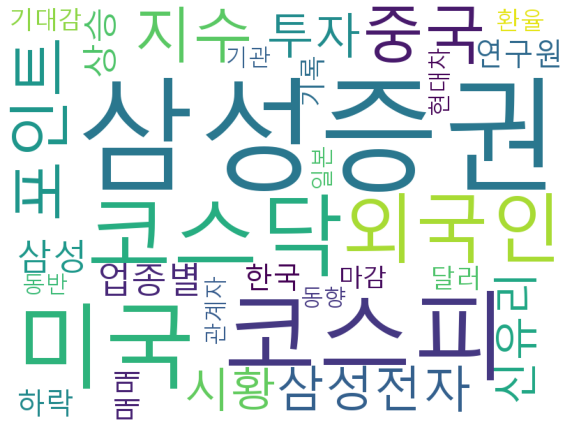

,0,기간
0,삼성증권,기간_A
1,삼성증권,기간_A
2,삼성증권,기간_A
3,삼성증권,기간_A
4,삼성증권,기간_A
...,...,...
515,관계자,기간_A
516,관계자,기간_A
517,관계자,기간_A
518,관계자,기간_A



경제민주화 분야의 청원 작성일 당일 부터 +30일까지(기간B) 426건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,삼성증권,투자자,증권사,금감원,관계자,주식,공매도,금융당국,직원들,청와대,김기식,청원,배당금,삼성,유령주식
1,389,170,155,99,98,95,95,93,93,82,80,66,63,52,52


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,감독원,배당,국민연금,직원,금융감독원,미국,한국,28억,가능성,위원회,거래소,금감원장,만큼,감독원장,피해자
1,51,50,49,49,46,45,44,44,43,42,37,36,35,35,35


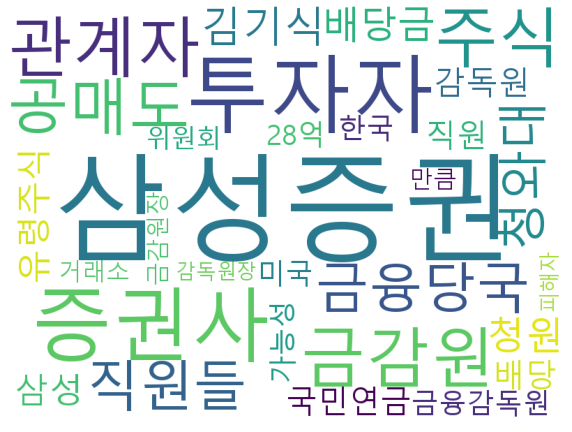

,0,기간
0,삼성증권,기간_B
1,삼성증권,기간_B
2,삼성증권,기간_B
3,삼성증권,기간_B
4,삼성증권,기간_B
...,...,...
2318,피해자,기간_B
2319,피해자,기간_B
2320,피해자,기간_B
2321,피해자,기간_B



경제민주화 분야의 청원 완료일 +1일 부터 +30일까지(기간C) 168건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,삼성증권,금감원,투자자,증권사,위원회,감독원,직원들,금융감독원,공매도,주식,임직원,삼성,관계자,계열사,가능성
1,134,59,53,43,40,38,36,35,33,30,30,30,27,26,23


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,미국,직원,금융위,한국,연구원,삼성전자,고의성,외국인,서울,금융위원회,배당,501만,팀장,중징계,코스피
1,20,20,20,19,19,19,19,17,15,15,15,14,14,13,13


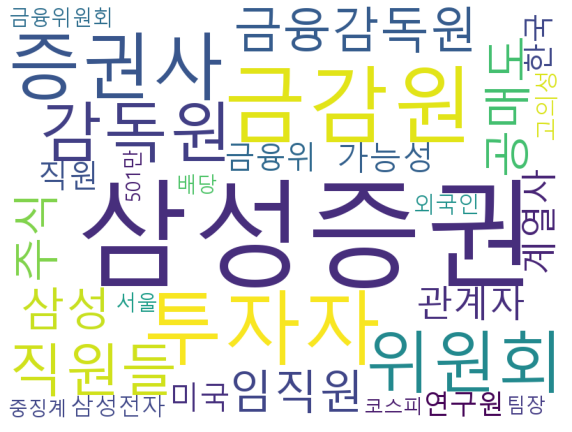

,0,기간
0,삼성증권,기간_C
1,삼성증권,기간_C
2,삼성증권,기간_C
3,삼성증권,기간_C
4,삼성증권,기간_C
...,...,...
884,코스피,기간_C
885,코스피,기간_C
886,코스피,기간_C
887,코스피,기간_C


,기간,0
0,기간_A,삼성증권
1,기간_A,삼성증권
2,기간_A,삼성증권
3,기간_A,삼성증권
4,기간_A,삼성증권
...,...,...
884,기간_C,코스피
885,기간_C,코스피
886,기간_C,코스피
887,기간_C,코스피


In [6]:
# 경제민주화
df2 = pd.read_excel('news_0908/경제민주화_20180306-20180606.xlsx')
wc_0908(df,df2,"경제민주화")

,Num,Class,Title,Date,Support
3,454158,기타,문재인 대통령님을 응원 합니다!,2020-03-27,1504597


3   2020-01-26
Name: Date, dtype: datetime64[ns]

3   2020-02-25
Name: Date, dtype: datetime64[ns]

3   2020-03-27
Name: Date, dtype: datetime64[ns]

3   2020-04-27
Name: Date, dtype: datetime64[ns]


기타 분야의 청원 작성일 -1일 부터 -30일까지(기간A) 2777건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,문재인,청와대,서울,중국,한국당,민주당,코로나19,한국,코로나,위원장,코로나바이러스,확진자,관계자,황교안,대통령
1,1496,1005,606,539,522,519,463,431,355,332,304,302,291,284,273


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,더불어민주당,감염증,위원회,대구,미국,울산,법무부,대한민국,코로,감염병,지역구,대변인,국민들,만큼,자유한국당
1,271,260,260,244,242,224,219,218,214,207,191,190,181,176,172


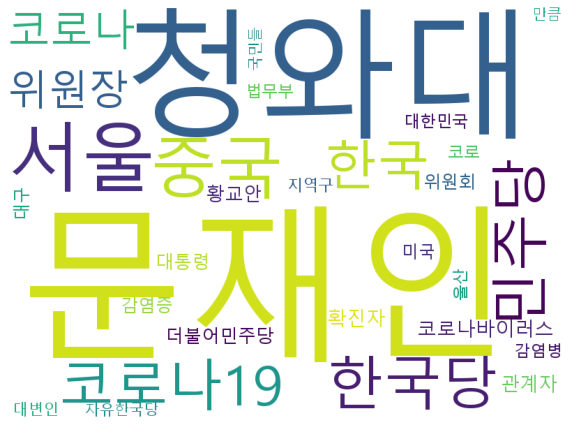

,0,기간
0,문재인,기간_A
1,문재인,기간_A
2,문재인,기간_A
3,문재인,기간_A
4,문재인,기간_A
...,...,...
10986,자유한국당,기간_A
10987,자유한국당,기간_A
10988,자유한국당,기간_A
10989,자유한국당,기간_A



기타 분야의 청원 작성일 당일 부터 +30일까지(기간B) 2862건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,문재인,코로나19,청와대,민주당,코로나,한국,위원장,서울,대구,더불어민주당,확진자,미국,중국,관계자,대통령
1,1538,1204,975,564,458,439,438,432,432,393,349,332,332,323,309


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,코로나바이러스,코로,통합당,미래통합당,황교안,위원회,대변인,감염증,경북,지역구,감염병,강민석,페이스북,소상공인,국민들
1,308,296,271,248,240,239,237,216,202,198,192,175,169,168,161


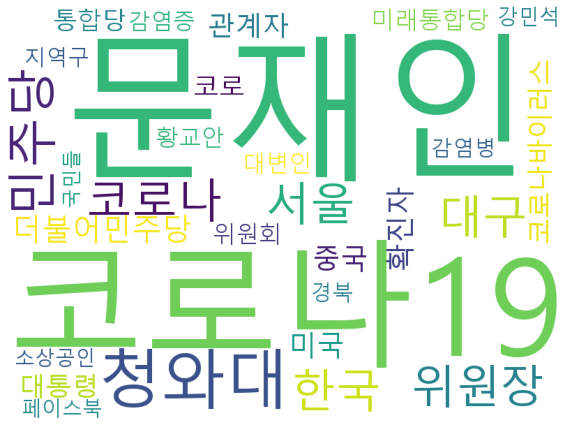

,0,기간
0,문재인,기간_B
1,문재인,기간_B
2,문재인,기간_B
3,문재인,기간_B
4,문재인,기간_B
...,...,...
11833,국민들,기간_B
11834,국민들,기간_B
11835,국민들,기간_B
11836,국민들,기간_B



기타 분야의 청원 완료일 +1일 부터 +30일까지(기간C) 3210건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,문재인,민주당,코로나19,청와대,위원장,통합당,더불어민주당,서울,코로나,한국,미래통합당,코로,지원금,김종인,황교안
1,1722,1140,1058,793,732,644,635,634,473,470,412,400,376,349,340


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,지역구,미국,관계자,대통령,코로나바이러스,더불어시민당,유권자,이낙연,국회의원,정의당,국민들,부산,대한민국,일자리,긴급재난지원금
1,327,310,294,268,264,258,248,245,233,232,222,221,221,205,202


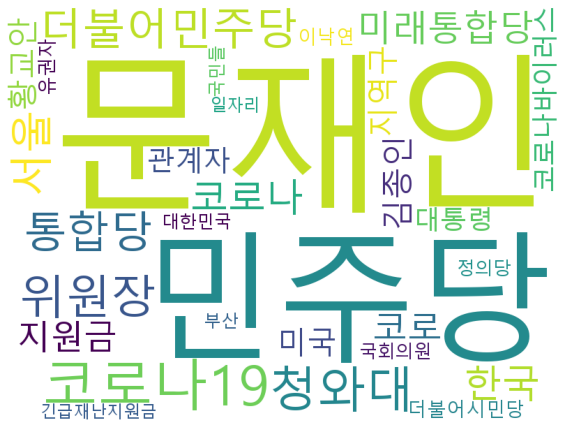

,0,기간
0,문재인,기간_C
1,문재인,기간_C
2,문재인,기간_C
3,문재인,기간_C
4,문재인,기간_C
...,...,...
13923,긴급재난지원금,기간_C
13924,긴급재난지원금,기간_C
13925,긴급재난지원금,기간_C
13926,긴급재난지원금,기간_C


,기간,0
0,기간_A,문재인
1,기간_A,문재인
2,기간_A,문재인
3,기간_A,문재인
4,기간_A,문재인
...,...,...
13923,기간_C,긴급재난지원금
13924,기간_C,긴급재난지원금
13925,기간_C,긴급재난지원금
13926,기간_C,긴급재난지원금


In [7]:
# 기타
df2 = pd.read_excel('news_0908/기타_20200126-20200427.xlsx')
wc_0908(df,df2,"기타")

,Num,Class,Title,Date,Support
17,454144,문화/예술/체육/언론,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다",2018-03-21,614127


17   2018-01-19
Name: Date, dtype: datetime64[ns]

17   2018-02-18
Name: Date, dtype: datetime64[ns]

17   2018-03-21
Name: Date, dtype: datetime64[ns]

17   2018-04-21
Name: Date, dtype: datetime64[ns]


문화/예술/체육/언론 분야의 청원 작성일 -1일 부터 -30일까지(기간A) 117건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,평창,빙상연맹,스피드스케이팅,노선영,한국,선수들,심석희,금메달,러시아,대표팀,김보름,1500m,대한빙상경기연맹,선수촌,출전권
1,82,63,56,56,39,38,36,34,34,34,32,30,30,30,24


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,평창올림픽,강릉,노진규,쇼트트랙,팀추월,이승훈,국제빙상경기연맹,관계자,매스,isu,국가대표,선수,올림픽,출전,골육종
1,24,23,23,22,21,19,19,18,16,16,16,15,15,15,15


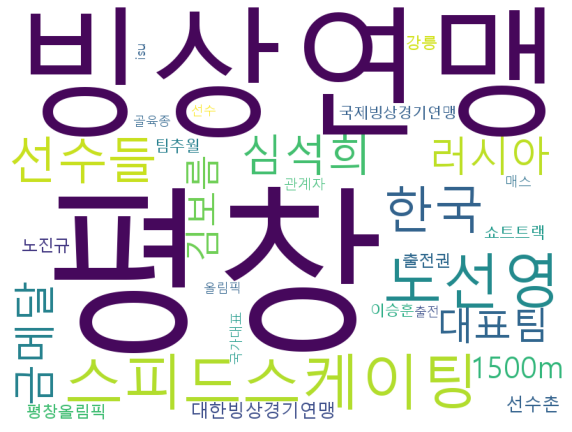

,0,기간
0,평창,기간_A
1,평창,기간_A
2,평창,기간_A
3,평창,기간_A
4,평창,기간_A
...,...,...
890,골육종,기간_A
891,골육종,기간_A
892,골육종,기간_A
893,골육종,기간_A



문화/예술/체육/언론 분야의 청원 작성일 당일 부터 +30일까지(기간B) 267건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,김보름,스피드스케이팅,팀추월,노선영,평창,박지우,한국,강릉,경기장,선수들,매스,은메달,금메달,대표팀,결승선
1,198,171,164,149,143,129,108,103,93,85,80,73,64,63,61


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,팀워크,경기,청원,선수,청와대,매스스타트,여자,이승훈,백철기,빙상연맹,기자회견,관계자,대표,대한빙상경기연맹,7위
1,54,54,53,53,49,49,49,43,41,39,38,34,30,29,27


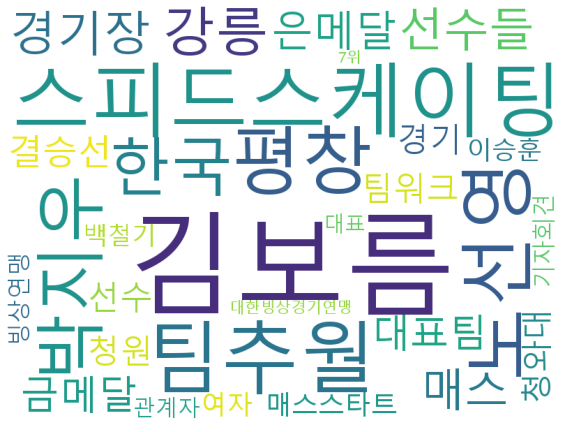

,0,기간
0,김보름,기간_B
1,김보름,기간_B
2,김보름,기간_B
3,김보름,기간_B
4,김보름,기간_B
...,...,...
2321,7위,기간_B
2322,7위,기간_B
2323,7위,기간_B
2324,7위,기간_B



문화/예술/체육/언론 분야의 청원 완료일 +1일 부터 +30일까지(기간C) 33건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,빙상연맹,평창,전명규,부회장,관계자,대한빙상경기연맹,스피드스케이팅,팀추월,노선영,금메달,청와대,연맹,논란,빙상,한국
1,23,22,19,16,13,13,13,11,11,10,9,9,9,8,8


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,청원,한국체대,노진규,이승훈,겨울왕국,김보름,sbs,올림픽,선수들,박지우,선수,게시판,사임서,매스,쇼트트랙
1,8,7,7,7,7,7,7,7,6,6,6,5,5,5,5


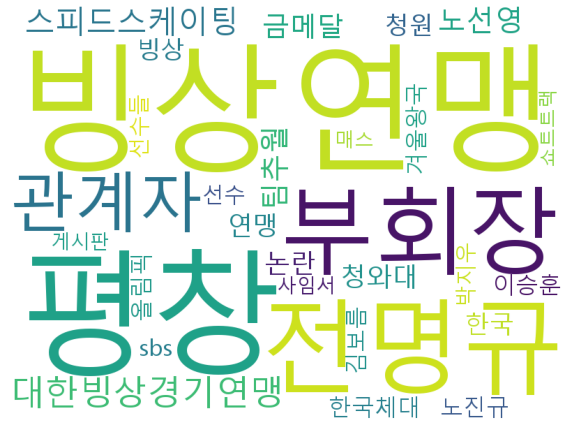

,0,기간
0,빙상연맹,기간_C
1,빙상연맹,기간_C
2,빙상연맹,기간_C
3,빙상연맹,기간_C
4,빙상연맹,기간_C
...,...,...
284,쇼트트랙,기간_C
285,쇼트트랙,기간_C
286,쇼트트랙,기간_C
287,쇼트트랙,기간_C


,기간,0
0,기간_A,평창
1,기간_A,평창
2,기간_A,평창
3,기간_A,평창
4,기간_A,평창
...,...,...
284,기간_C,쇼트트랙
285,기간_C,쇼트트랙
286,기간_C,쇼트트랙
287,기간_C,쇼트트랙


In [8]:
# 문화/예술/체육/언론
df2 = pd.read_excel('news_0908/문화_예술_체육_언론_20180119-20180421.xlsx')
wc_0908(df,df2,"문화/예술/체육/언론")

,Num,Class,Title,Date,Support
16,454145,미래,조두순 출소반대,2017-12-05,615354


16   2017-10-05
Name: Date, dtype: datetime64[ns]

16   2017-11-04
Name: Date, dtype: datetime64[ns]

16   2017-12-05
Name: Date, dtype: datetime64[ns]

16   2018-01-05
Name: Date, dtype: datetime64[ns]


미래 분야의 청원 작성일 -1일 부터 -30일까지(기간A) 9건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,조두순,성폭행,범죄자,여중생,변호사,성범죄자,개정안,등굣길,어린이집,상한선,김길태,박진영,성범죄,위험성,재판소
1,7,6,6,6,6,5,5,5,5,5,5,5,5,5,5


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,약식기소,자문변호사,강제추행,대한의사협회,전과자들,여성가족부,가족부,헌법재판소,차등화,유현정,안성희,법률자문관,자문관,전과자,성범죄자들
1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


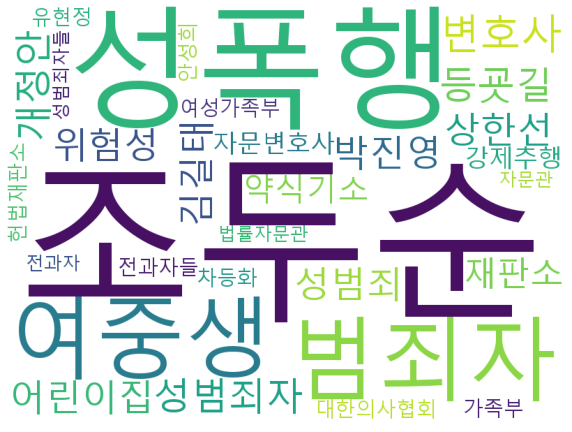

,0,기간
0,조두순,기간_A
1,조두순,기간_A
2,조두순,기간_A
3,조두순,기간_A
4,조두순,기간_A
...,...,...
151,성범죄자들,기간_A
152,성범죄자들,기간_A
153,성범죄자들,기간_A
154,성범죄자들,기간_A



미래 분야의 청원 작성일 당일 부터 +30일까지(기간B) 58건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,조두순,청원,청와대,20만,홈페이지,국민청원,게시판,성폭행,심신미약,문재인,소년법,나영이,피해자,관계자,더불어민주당
1,52,48,45,24,22,20,18,17,12,12,12,12,11,10,10


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,무기징역,감경,조두순이,경북,사람들,범죄자,안산,성범죄,주취감형,주취감,불가능,주취감경,참여자,이국종,출소
1,9,8,7,7,7,7,7,6,6,6,6,6,6,6,6


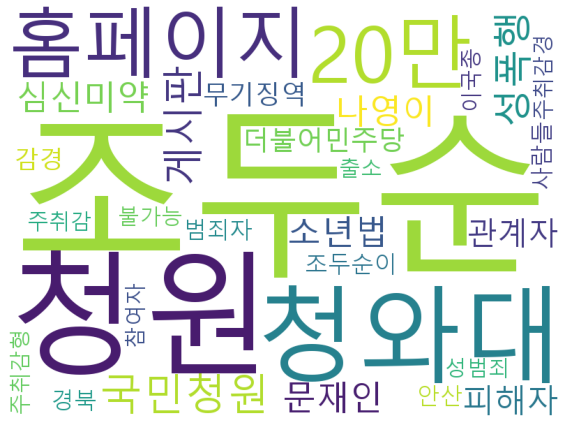

,0,기간
0,조두순,기간_B
1,조두순,기간_B
2,조두순,기간_B
3,조두순,기간_B
4,조두순,기간_B
...,...,...
420,출소,기간_B
421,출소,기간_B
422,출소,기간_B
423,출소,기간_B



미래 분야의 청원 완료일 +1일 부터 +30일까지(기간C) 57건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,조두순,청와대,청원,감경,불가능,성범죄,성폭행,주취감경,성폭력,피해자,무기징역,상해,범죄자,민정수석,홈페이지
1,54,37,35,27,23,22,19,18,14,14,12,12,11,11,11


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,심신미약,재심,전자발찌,피의자,개정안,음주,현행법,국민들,법무부,페이스북,수석,참여자,변호사,창원,서울
1,10,10,10,9,9,9,9,8,8,8,8,8,7,7,7


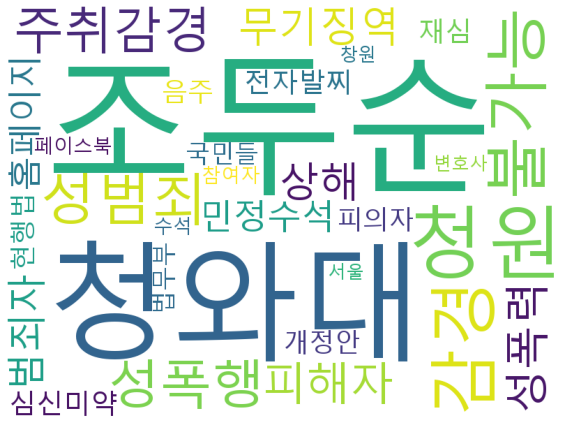

,0,기간
0,조두순,기간_C
1,조두순,기간_C
2,조두순,기간_C
3,조두순,기간_C
4,조두순,기간_C
...,...,...
442,서울,기간_C
443,서울,기간_C
444,서울,기간_C
445,서울,기간_C


,기간,0
0,기간_A,조두순
1,기간_A,조두순
2,기간_A,조두순
3,기간_A,조두순
4,기간_A,조두순
...,...,...
442,기간_C,서울
443,기간_C,서울
444,기간_C,서울
445,기간_C,서울


In [9]:
# 미래
df2 = pd.read_excel('news_0908/미래_20170806-20180105.xlsx')
wc_0908(df,df2,"미래")

,Num,Class,Title,Date,Support
98,454063,반려동물,고양이를 잔혹하게 학대하고 먹는 단체 오픈카톡방 “*****”을 수사하고 처벌하여 ...,2021-02-06,275492


98   2020-12-07
Name: Date, dtype: datetime64[ns]

98   2021-01-06
Name: Date, dtype: datetime64[ns]

98   2021-02-06
Name: Date, dtype: datetime64[ns]

98   2021-03-09
Name: Date, dtype: datetime64[ns]


반려동물 분야의 청원 작성일 -1일 부터 -30일까지(기간A) 21건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,마리,동물학대,동물,학대,미국,인스타그램,보호법,광주,고양,a씨,인근,수사,동물병원,청와대,반려견
1,11,10,5,5,5,4,4,3,3,3,3,3,3,3,3


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,청원,목줄,포항,쥐불놀이,영상,강아지,코로나19,한국,ㄱ씨,길고양이,공무원,반려동물,충북,옥천경찰서,앞범퍼
1,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2


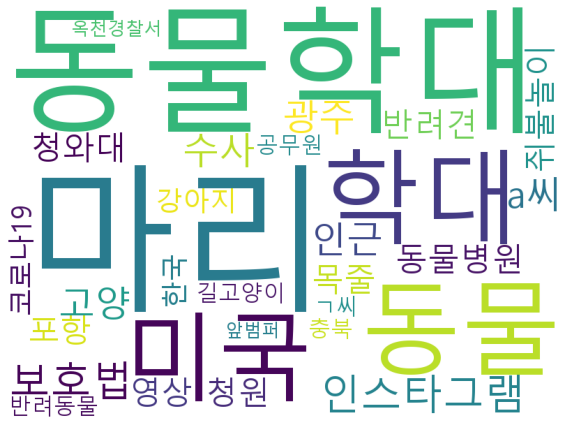

,0,기간
0,마리,기간_A
1,마리,기간_A
2,마리,기간_A
3,마리,기간_A
4,마리,기간_A
...,...,...
101,충북,기간_A
102,옥천경찰서,기간_A
103,옥천경찰서,기간_A
104,앞범퍼,기간_A



반려동물 분야의 청원 작성일 당일 부터 +30일까지(기간B) 22건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,동물학대,동물,보호법,동물자유연대,수족관,조희경,학대,청와대,동물보호법,마리,sns,해수부,길고양이,청원,사람들
1,11,8,8,7,6,6,6,6,6,5,5,5,5,5,4


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,연쇄살인범,살인범,포항시,n번방,동물원,동물들,거제씨월드,핫핑크돌핀스,서울,활동가,벨루가,보호소,견주,소유권,반려견
1,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3


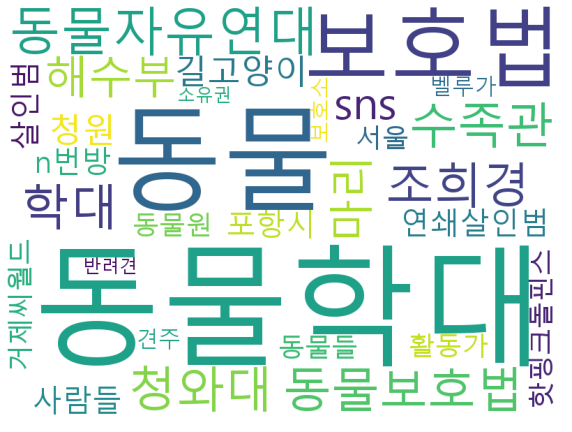

,0,기간
0,동물학대,기간_B
1,동물학대,기간_B
2,동물학대,기간_B
3,동물학대,기간_B
4,동물학대,기간_B
...,...,...
137,소유권,기간_B
138,소유권,기간_B
139,반려견,기간_B
140,반려견,기간_B



반려동물 분야의 청원 완료일 +1일 부터 +30일까지(기간C) 13건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,동물,동물원,마리,대구,동물들,과태료,대구시,코로나19,목줄,학대,네트워크,미이행,보호법,동물학대,운전자
1,6,6,5,5,5,5,5,4,4,4,4,4,3,3,3


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,경찰,확인,비글,행정처분,일본원숭이,일본,관계기관,반려동물,동물보호법,소유자,관계자,동물보호단체,대책,보호,계획
1,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2


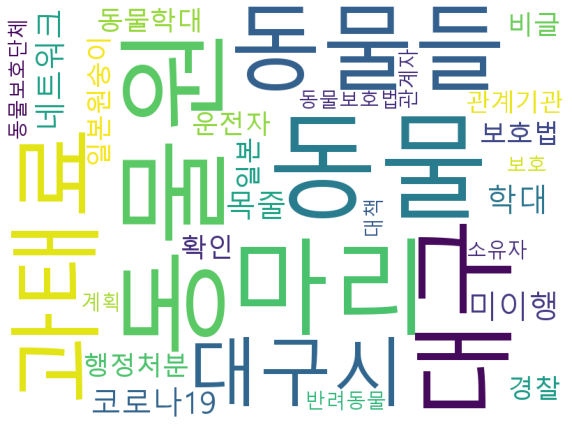

,0,기간
0,동물,기간_C
1,동물,기간_C
2,동물,기간_C
3,동물,기간_C
4,동물,기간_C
...,...,...
98,대책,기간_C
99,보호,기간_C
100,보호,기간_C
101,계획,기간_C


,기간,0
0,기간_A,마리
1,기간_A,마리
2,기간_A,마리
3,기간_A,마리
4,기간_A,마리
...,...,...
98,기간_C,대책
99,기간_C,보호
100,기간_C,보호
101,기간_C,계획


In [10]:
# 반려동물
df2 = pd.read_excel('news_0908/반려동물_20201207-20210309.xlsx')
wc_0908(df,df2,"반려동물")

,Num,Class,Title,Date,Support
8,454153,보건복지,중국인 입국 금지 요청,2020-02-22,761833


8   2019-12-23
Name: Date, dtype: datetime64[ns]

8   2020-01-22
Name: Date, dtype: datetime64[ns]

8   2020-02-22
Name: Date, dtype: datetime64[ns]

8   2020-03-24
Name: Date, dtype: datetime64[ns]


보건복지 분야의 청원 작성일 -1일 부터 -30일까지(기간A) 3건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,미국,이슬람,입국금지,행정명령,미얀마,나이지리아,관계자,데가니,보스턴,이라크,7개국,다보스,벨라루스,러시아,wsj
1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,급진주의,도널드,우여곡절,리비아,소말리아,중국,시리아,영향력,예멘,세계경제포럼,월스트리트저널,독도,전시관,한국,일본
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


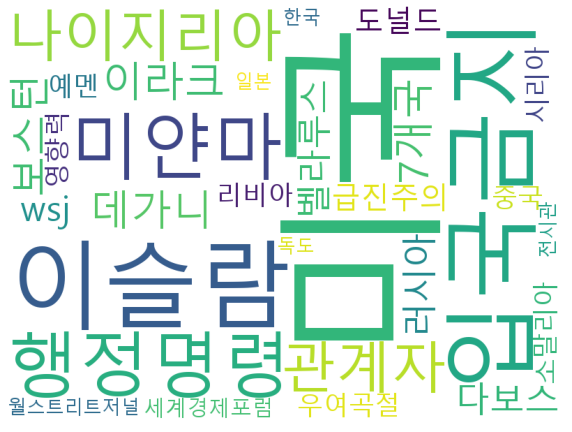

,0,기간
0,미국,기간_A
1,미국,기간_A
2,이슬람,기간_A
3,이슬람,기간_A
4,입국금지,기간_A
5,입국금지,기간_A
6,행정명령,기간_A
7,행정명령,기간_A
8,미얀마,기간_A
9,미얀마,기간_A



보건복지 분야의 청원 작성일 당일 부터 +30일까지(기간B) 147건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,중국,중국인,후베이성,외국인,코로나바이러스,확진자,청와대,코로나,한국,후베이,코로,감염증,우한,감염병,입국금지
1,139,83,64,64,54,48,43,42,39,39,34,34,27,27,25


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,민주당,미국,문재인,만큼,일본,한국당,입국자,서울,박능후,접촉자,2주,청원,제주,가능성,정세균
1,22,21,20,20,19,19,18,18,17,17,16,16,16,15,15


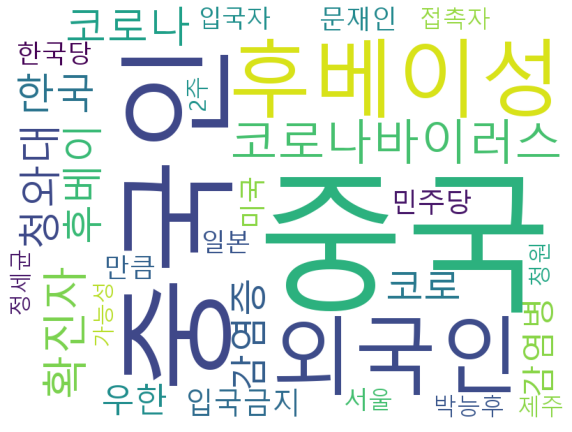

,0,기간
0,중국,기간_B
1,중국,기간_B
2,중국,기간_B
3,중국,기간_B
4,중국,기간_B
...,...,...
1026,정세균,기간_B
1027,정세균,기간_B
1028,정세균,기간_B
1029,정세균,기간_B



보건복지 분야의 청원 완료일 +1일 부터 +30일까지(기간C) 213건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,중국,코로나19,한국,확진자,한국인,중국인,코로나,미국,일본,입국자,외국인,코로나바이러스,대구,입국금지,한국발
1,175,161,113,82,76,74,59,58,51,47,46,42,41,41,35


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,박능후,감염병,외교부,코로,청와대,강경화,이탈리아,중국발,신천지,문재인,유럽,감염증,사망자,전문가,경북
1,34,33,33,32,29,29,28,26,26,25,25,24,23,23,22


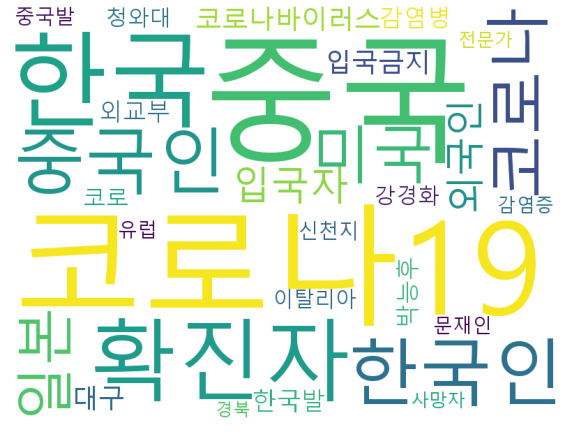

,0,기간
0,중국,기간_C
1,중국,기간_C
2,중국,기간_C
3,중국,기간_C
4,중국,기간_C
...,...,...
1508,경북,기간_C
1509,경북,기간_C
1510,경북,기간_C
1511,경북,기간_C


,기간,0
0,기간_A,미국
1,기간_A,미국
2,기간_A,이슬람
3,기간_A,이슬람
4,기간_A,입국금지
...,...,...
1508,기간_C,경북
1509,기간_C,경북
1510,기간_C,경북
1511,기간_C,경북


In [11]:
# 보건복지
df2 = pd.read_excel('news_0908/보건복지_20191223-20200324.xlsx')
wc_0908(df,df2,"보건복지")

,Num,Class,Title,Date,Support
121,454040,성장동력,전안법 합리적으로 개정 또는 폐지해주세요.(소상공인 소비자 모두 죽는법안입니다.),2018-01-02,255554


121   2017-11-02
Name: Date, dtype: datetime64[ns]

121   2017-12-02
Name: Date, dtype: datetime64[ns]

121   2018-01-02
Name: Date, dtype: datetime64[ns]

121   2018-02-02
Name: Date, dtype: datetime64[ns]


성장동력 분야의 청원 작성일 -1일 부터 -30일까지(기간A) 0건 워드클라우드


성장동력 분야의 청원 작성일 당일 부터 +30일까지(기간B) 21건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,전안법,개정안,본회의,생활용품,소상공인,전기용품,원내대표,한국당,감사원장,후보자,김성태,최재형,kc,범법자,20만
1,18,16,15,12,12,9,9,8,7,7,6,6,6,5,5


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,위원장,시간강사법,개헌특위,우원식,민주당,공급자,청와대,청원,위원회,강사법,정세균,더불어민주당,소상공인들,임시국회,민생법안
1,5,5,5,5,5,4,4,4,4,4,4,4,4,3,3


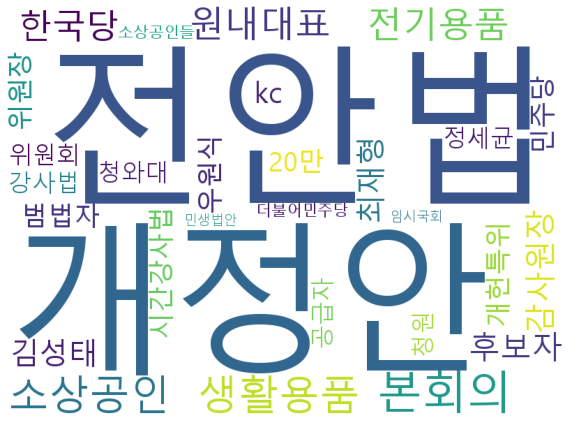

,0,기간
0,전안법,기간_B
1,전안법,기간_B
2,전안법,기간_B
3,전안법,기간_B
4,전안법,기간_B
...,...,...
199,임시국회,기간_B
200,임시국회,기간_B
201,민생법안,기간_B
202,민생법안,기간_B



성장동력 분야의 청원 완료일 +1일 부터 +30일까지(기간C) 25건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,전안법,한국당,김종석,본회의,ㅅㄱㅂㅊ,국회의원,ㅁㅊㅅㄲ,청원,청와대,문자열,안전법,문자,조두순,20만,국민청원
1,17,15,13,12,12,11,11,10,10,9,9,8,7,7,7


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,의원,보호법,누리꾼,소상공인,나경원,전기용품,전기생활용품안전법,입장문,발신전용,건씩,문자메시지,시민,성폭행,평창,페이스북
1,7,6,6,5,5,5,5,5,5,5,5,5,4,4,4


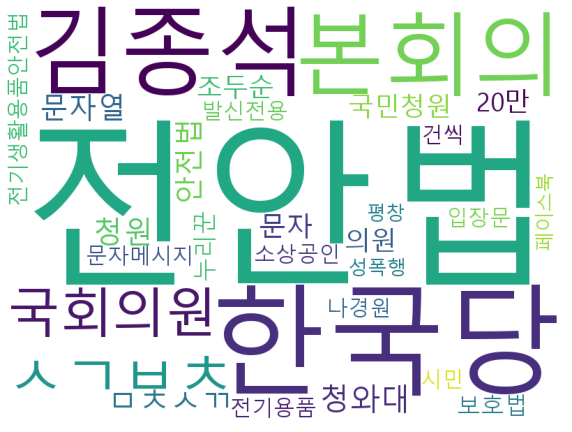

,0,기간
0,전안법,기간_C
1,전안법,기간_C
2,전안법,기간_C
3,전안법,기간_C
4,전안법,기간_C
...,...,...
229,평창,기간_C
230,페이스북,기간_C
231,페이스북,기간_C
232,페이스북,기간_C


UnboundLocalError: local variable 'temp_A' referenced before assignment

In [12]:
# 성장동력
df2 = pd.read_excel('news_0908/성장동력_20171102-20180202.xlsx')
wc_0908(df,df2,"성장동력")

,Num,Class,Title,Date,Support
0,454161,안전/환경,텔레그램 n번방 용의자 신상공개 및 포토라인 세워주세요,2020-04-17,2715626


0   2020-02-16
Name: Date, dtype: datetime64[ns]

0   2020-03-17
Name: Date, dtype: datetime64[ns]

0   2020-04-17
Name: Date, dtype: datetime64[ns]

0   2020-05-18
Name: Date, dtype: datetime64[ns]


안전/환경 분야의 청원 작성일 -1일 부터 -30일까지(기간A) 32건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,텔레그램,코로나19,성범죄,미국,청원,성착취,코로나바이러스,온라인,대구,대화방,신천지,관계자,피해자,경찰청,미래통합당
1,20,13,7,7,7,6,6,6,6,6,6,5,5,5,5


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,청와대,여성들,성착,텍사스,한국,추신수,시범경기,위원회,본회의,새누리,이준석,칭찬방,페이스북,신도,n번방
1,5,4,4,4,4,4,4,4,4,4,4,4,4,4,3


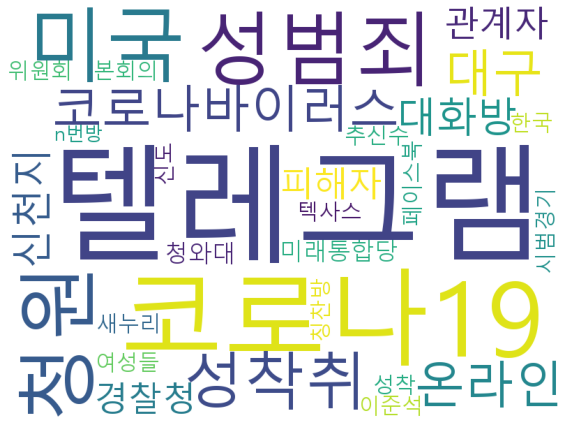

,0,기간
0,텔레그램,기간_A
1,텔레그램,기간_A
2,텔레그램,기간_A
3,텔레그램,기간_A
4,텔레그램,기간_A
...,...,...
165,신도,기간_A
166,신도,기간_A
167,n번방,기간_A
168,n번방,기간_A



안전/환경 분야의 청원 작성일 당일 부터 +30일까지(기간B) 1852건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,텔레그램,박사방,조주빈,n번방,피해자,성범죄,운영자,성착취,조씨,미성년자,음란물,서울,대화방,착취물,성폭력
1,1308,896,828,695,687,560,532,510,364,357,339,317,313,310,282


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,피의자,관계자,성착취물,가해자,청원,청와대,피해자들,위원회,영상물,변호사,온라인,서울지방경찰청,여성들,성착,경찰
1,278,277,260,237,211,211,202,185,169,166,164,158,157,154,149


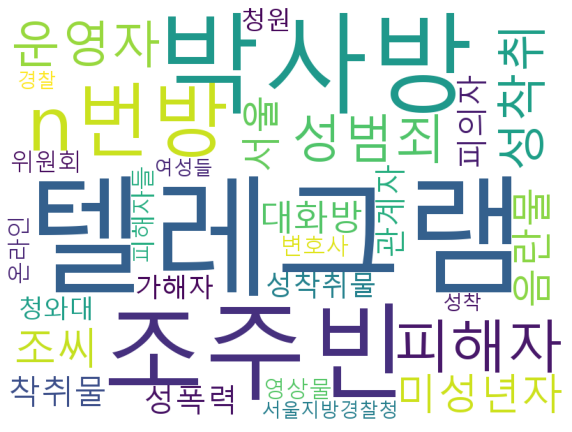

,0,기간
0,텔레그램,기간_B
1,텔레그램,기간_B
2,텔레그램,기간_B
3,텔레그램,기간_B
4,텔레그램,기간_B
...,...,...
11271,경찰,기간_B
11272,경찰,기간_B
11273,경찰,기간_B
11274,경찰,기간_B



안전/환경 분야의 청원 완료일 +1일 부터 +30일까지(기간C) 857건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,텔레그램,피해자,n번방,조주빈,박사방,성범죄,착취물,성착취,운영자,성착취물,갓갓,대화방,위원회,미성년자,영상물
1,487,305,267,242,232,228,195,189,186,161,160,158,144,138,137


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,성착,취물,피의자,음란물,성폭력,개정안,관계자,경찰청,본회의,민주당,경찰,서울,코로나19,구속영장,방지법
1,136,132,129,120,116,114,109,103,102,91,88,86,84,83,82


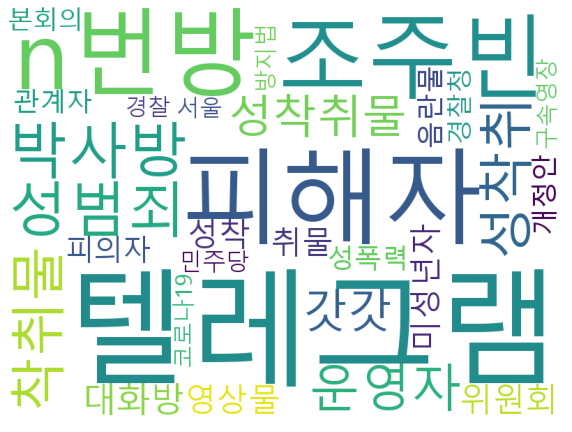

,0,기간
0,텔레그램,기간_C
1,텔레그램,기간_C
2,텔레그램,기간_C
3,텔레그램,기간_C
4,텔레그램,기간_C
...,...,...
4799,방지법,기간_C
4800,방지법,기간_C
4801,방지법,기간_C
4802,방지법,기간_C


,기간,0
0,기간_A,텔레그램
1,기간_A,텔레그램
2,기간_A,텔레그램
3,기간_A,텔레그램
4,기간_A,텔레그램
...,...,...
4799,기간_C,방지법
4800,기간_C,방지법
4801,기간_C,방지법
4802,기간_C,방지법


In [13]:
# 안전/환경
df2 = pd.read_excel('news_0908/안전_환경_20200216-20200518.xlsx')
wc_0908(df,df2,"안전/환경")

,Num,Class,Title,Date,Support
12,454149,외교/통일/국방,"제주도 불법 난민 신청 문제에 따른 난민법, 무사증 입국, 난민신청허가 폐지/개헌 ...",2018-07-13,714875


12   2018-05-13
Name: Date, dtype: datetime64[ns]

12   2018-06-12
Name: Date, dtype: datetime64[ns]

12   2018-07-13
Name: Date, dtype: datetime64[ns]

12   2018-08-13
Name: Date, dtype: datetime64[ns]


외교/통일/국방 분야의 청원 작성일 -1일 부터 -30일까지(기간A) 2건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,제주,예멘,무사증,법무부,외국인,김성인,위원장,이성호,외국인청,감단,말레이시아,예멘인,출입국,한국,신강협
1,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1


,15,16,17,18,19,20,21,22,23,24,25
0,사람들,제주출입국,난민제도,장기체류,제주도,신청자,난민들,난민심사,만큼,난민신청자,인권위원장
1,1,1,1,1,1,1,1,1,1,1,1


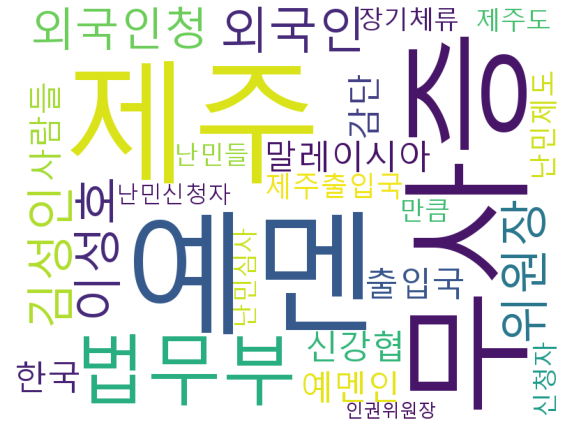

,0,기간
0,제주,기간_A
1,제주,기간_A
2,예멘,기간_A
3,예멘,기간_A
4,무사증,기간_A
5,무사증,기간_A
6,법무부,기간_A
7,법무부,기간_A
8,외국인,기간_A
9,외국인,기간_A



외교/통일/국방 분야의 청원 작성일 당일 부터 +30일까지(기간B) 214건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,제주도,예멘,제주,한국,신청자,예멘인,법무부,청와대,난민법,청원,사람들,예멘인들,출입국,일자리,외국인
1,173,173,129,90,81,75,74,66,61,54,51,44,44,43,41


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,무사증,난민들,외국인청,난민,우리나라,서울,이슬람,말레이시아,관계자,위원회,대한민국,난민신청,판원,제주출입국,8개월
1,38,37,34,32,26,25,23,21,18,18,17,17,17,17,17


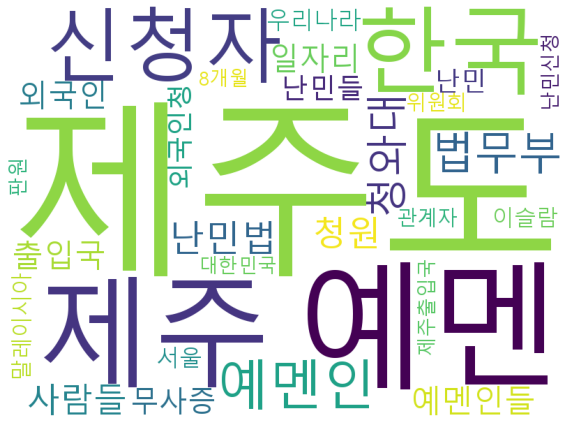

,0,기간
0,제주도,기간_B
1,제주도,기간_B
2,제주도,기간_B
3,제주도,기간_B
4,제주도,기간_B
...,...,...
1551,8개월,기간_B
1552,8개월,기간_B
1553,8개월,기간_B
1554,8개월,기간_B



외교/통일/국방 분야의 청원 완료일 +1일 부터 +30일까지(기간C) 71건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,제주도,예멘,제주,한국,청와대,청원,법무부,신청자,난민법,외국인,박상기,예멘인,무사증,우리나라,이슬람
1,48,42,39,30,26,24,22,22,20,16,15,14,13,10,9


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,예멘인들,일자리,유럽,미국,난민협약,서울,국민청원,일본,사람들,난민,가입국,천주교,제주교구,전염병,이주민
1,9,9,9,9,8,7,6,6,6,6,6,6,6,5,5


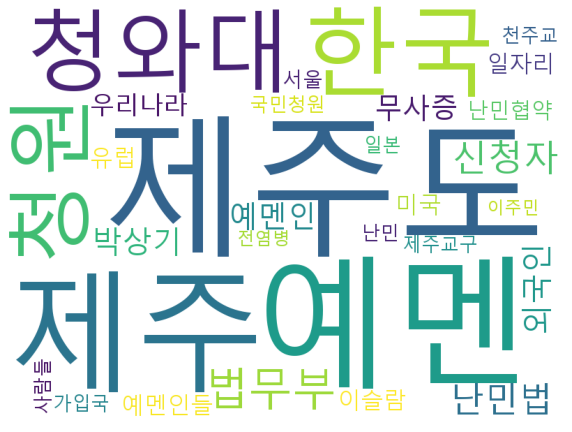

,0,기간
0,제주도,기간_C
1,제주도,기간_C
2,제주도,기간_C
3,제주도,기간_C
4,제주도,기간_C
...,...,...
448,이주민,기간_C
449,이주민,기간_C
450,이주민,기간_C
451,이주민,기간_C


,기간,0
0,기간_A,제주
1,기간_A,제주
2,기간_A,예멘
3,기간_A,예멘
4,기간_A,무사증
...,...,...
448,기간_C,이주민
449,기간_C,이주민
450,기간_C,이주민
451,기간_C,이주민


In [14]:
# 외교/통일/국방
df2 = pd.read_excel('news_0908/외교_통일_국방_20180513-20180813.xlsx')
wc_0908(df,df2,"외교/통일/국방")

In [ ]:
# 육아/교육
df2 = pd.read_excel('news_0908/육아_교육_20200218-20200520.xlsx')
wc_0908(df,df2,"육아/교육")

,Num,Class,Title,Date,Support
5,454156,인권/성평등,"신천지 예수교 증거장막성전(이하, 신천지)의 강제 해체(해산)을 청원합니다.",2020-03-23,1449521


5   2020-01-22
Name: Date, dtype: datetime64[ns]

5   2020-02-21
Name: Date, dtype: datetime64[ns]

5   2020-03-23
Name: Date, dtype: datetime64[ns]

5   2020-04-23
Name: Date, dtype: datetime64[ns]


인권/성평등 분야의 청원 작성일 -1일 부터 -30일까지(기간A) 53건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,확진자,신천지,코로나19,대구,중국,대구교회,가능성,정은경,본부장,대남병원,감염원,서울,감염자,경북,청도
1,41,39,37,32,31,17,16,15,14,13,13,12,12,12,11


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,신도,31번,관계자,신천지교회,장례식,코로나,이만희,보건당국,1명,교인들,발병,감염병,대구시,역학조사,우한
1,10,10,10,10,9,9,8,7,7,7,7,7,7,6,6


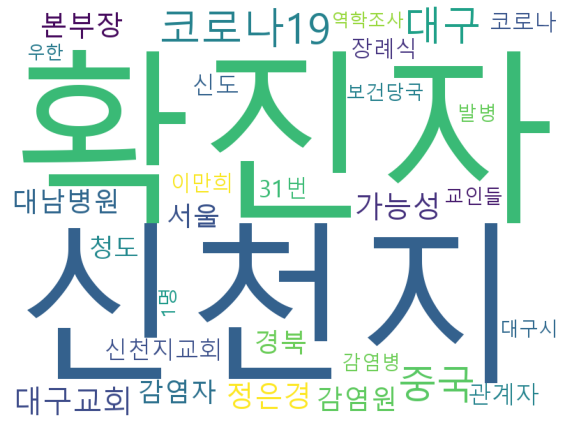

,0,기간
0,확진자,기간_A
1,확진자,기간_A
2,확진자,기간_A
3,확진자,기간_A
4,확진자,기간_A
...,...,...
430,우한,기간_A
431,우한,기간_A
432,우한,기간_A
433,우한,기간_A



인권/성평등 분야의 청원 작성일 당일 부터 +30일까지(기간B) 655건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,신천지,중국,코로나19,확진자,대구,코로나,신도,한국,우한,중국인,경북,코로,사망자,서울,감염병
1,503,450,450,417,333,171,170,159,120,120,116,107,104,102,99


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,코로나바이러스,부산,미국,한국인,대구교회,문재인,전문가,청와대,사람들,관계자,이만희,1명,가능성,감염증,감염자
1,92,80,77,68,65,64,63,62,59,57,56,55,52,48,47


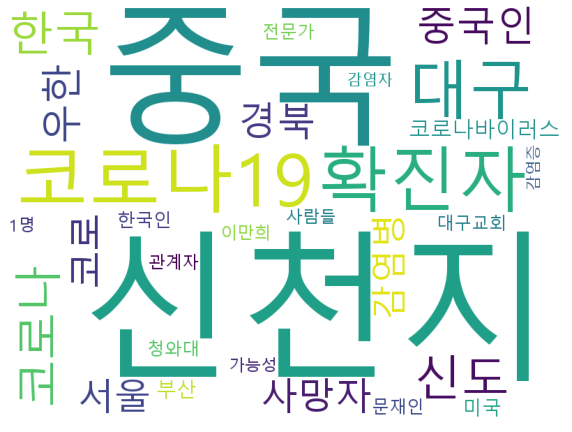

,0,기간
0,신천지,기간_B
1,신천지,기간_B
2,신천지,기간_B
3,신천지,기간_B
4,신천지,기간_B
...,...,...
4361,감염자,기간_B
4362,감염자,기간_B
4363,감염자,기간_B
4364,감염자,기간_B



인권/성평등 분야의 청원 완료일 +1일 부터 +30일까지(기간C) 56건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,중국,코로나19,확진자,신천지,코로나,한국,대구,미국,유럽,코로,사망자,경북,문재인,감염자,감염병
1,39,35,35,32,26,25,24,19,15,14,10,9,9,9,8


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,입국자,시민들,중국발,의료진,1만,치명률,집단감염,페이스북,전문가,이탈리아,자가격리,스페인,황교안,개신교,신도
1,8,7,6,6,6,6,6,5,5,5,5,5,5,4,4


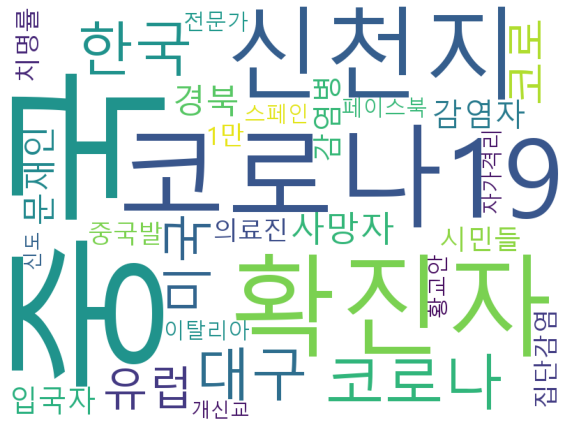

,0,기간
0,중국,기간_C
1,중국,기간_C
2,중국,기간_C
3,중국,기간_C
4,중국,기간_C
...,...,...
387,개신교,기간_C
388,신도,기간_C
389,신도,기간_C
390,신도,기간_C


,기간,0
0,기간_A,확진자
1,기간_A,확진자
2,기간_A,확진자
3,기간_A,확진자
4,기간_A,확진자
...,...,...
387,기간_C,개신교
388,기간_C,신도
389,기간_C,신도
390,기간_C,신도


In [15]:
# 인권/성평등
df2 = pd.read_excel('news_0908/인권_성평등_20200122-20200423.xlsx')
wc_0908(df,df2,"인권/성평등")

In [ ]:
# 일자리
df2 = pd.read_excel('news_0908/일자리_20200126-20200427.xlsx')
wc_0908(df,df2,"일자리")

,Num,Class,Title,Date,Support
2,454159,정치개혁,자유 한국당 정당해산 청원,2019-05-22,1831900


2   2019-03-22
Name: Date, dtype: datetime64[ns]

2   2019-04-21
Name: Date, dtype: datetime64[ns]

2   2019-05-22
Name: Date, dtype: datetime64[ns]

2   2019-06-22
Name: Date, dtype: datetime64[ns]


정치개혁 분야의 청원 작성일 -1일 부터 -30일까지(기간A) 29건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,한국당,통영,황교안,고성,경남,정점식,국회의원,창원,자유한국당,민주당,정의당,법무부,태스크포스,보궐선거,문재인
1,19,13,12,12,12,11,9,9,8,8,8,8,7,7,7


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,서울대,성산,후보자,청와대,위원회,여영국,통진당,문형배,서울,위원장,바른미래당,당선인,이재환,서울중앙지검,팀장
1,6,6,5,5,5,5,5,4,4,4,4,4,4,4,4


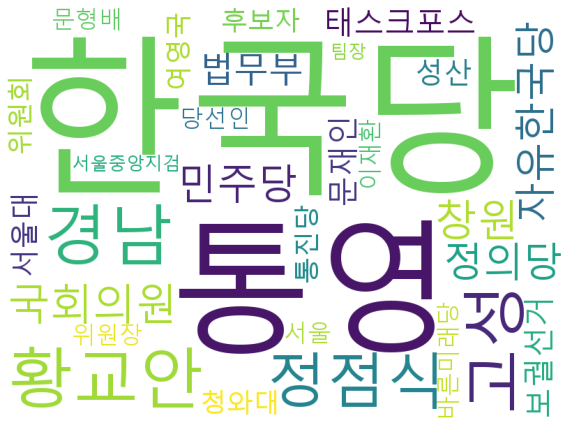

,0,기간
0,한국당,기간_A
1,한국당,기간_A
2,한국당,기간_A
3,한국당,기간_A
4,한국당,기간_A
...,...,...
214,서울중앙지검,기간_A
215,팀장,기간_A
216,팀장,기간_A
217,팀장,기간_A



정치개혁 분야의 청원 작성일 당일 부터 +30일까지(기간B) 199건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,한국당,청와대,청원,자유한국당,패스트트랙,더불어민주당,민주당,나경원,황교안,서울,국민청원,게시판,문재인,원내대표,장외투쟁
1,171,132,126,120,82,79,76,49,46,43,42,42,41,36,36


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,20만,홈페이지,신속처리안건,국회의원,선거법,유튜버,박근혜,대한민국,위원회,민주주의,박원순,베트남,광화문,100만,의원들
1,33,28,25,24,22,21,20,20,19,18,18,18,17,17,16


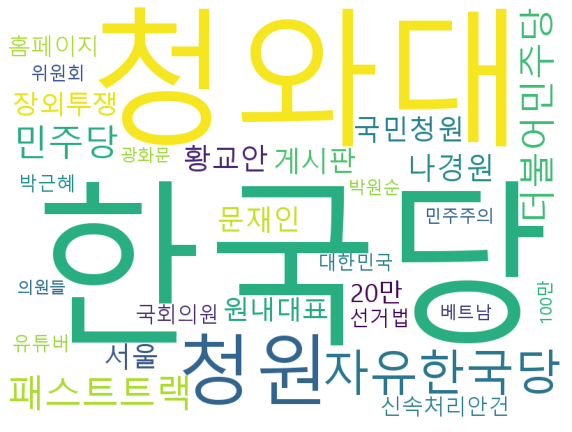

,0,기간
0,한국당,기간_B
1,한국당,기간_B
2,한국당,기간_B
3,한국당,기간_B
4,한국당,기간_B
...,...,...
1432,의원들,기간_B
1433,의원들,기간_B
1434,의원들,기간_B
1435,의원들,기간_B



정치개혁 분야의 청원 완료일 +1일 부터 +30일까지(기간C) 71건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,한국당,청와대,자유한국당,청원,민주당,나경원,강기정,원내대표,더불어민주당,황교안,국회의원,막말,문재인,패스트트랙,국민청원
1,62,46,36,33,27,26,25,22,21,19,18,18,17,16,14


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,국민들,바른미래당,주권자,비서관,대변인,정무수석,복기왕,선거법,이인영,민주주의,정의당,게시판,관계자,김무성,구속영장
1,14,14,14,11,10,10,10,10,9,9,9,9,8,8,7


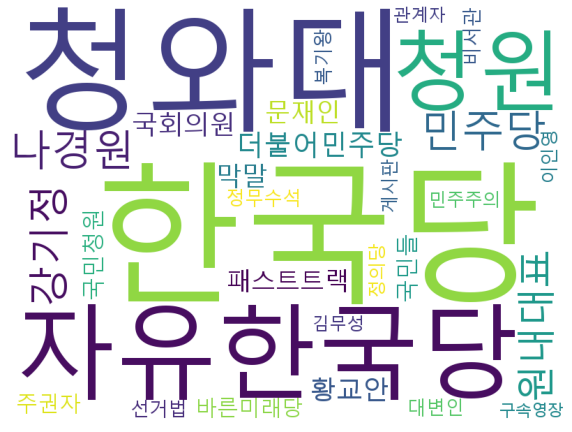

,0,기간
0,한국당,기간_C
1,한국당,기간_C
2,한국당,기간_C
3,한국당,기간_C
4,한국당,기간_C
...,...,...
547,구속영장,기간_C
548,구속영장,기간_C
549,구속영장,기간_C
550,구속영장,기간_C


,기간,0
0,기간_A,한국당
1,기간_A,한국당
2,기간_A,한국당
3,기간_A,한국당
4,기간_A,한국당
...,...,...
547,기간_C,구속영장
548,기간_C,구속영장
549,기간_C,구속영장
550,기간_C,구속영장


In [16]:
# 정치개혁
df2 = pd.read_excel('news_0908/정치개혁_20190322-20190622.xlsx')
wc_0908(df,df2,"정치개혁")

,Num,Class,Title,Date,Support
34,454127,행정,정부의 교회 정규 예배 이외 행사 금지를 취소해주세요.,2020-08-07,427470


34   2020-06-07
Name: Date, dtype: datetime64[ns]

34   2020-07-07
Name: Date, dtype: datetime64[ns]

34   2020-08-07
Name: Date, dtype: datetime64[ns]

34   2020-09-07
Name: Date, dtype: datetime64[ns]


행정 분야의 청원 작성일 -1일 부터 -30일까지(기간A) 297건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,코로나19,확진자,서울,코로나,광주,미국,관계자,2단계,광주시,중국,한국,2주,위원장,코로나바이러스,방역수칙
1,107,96,56,51,48,48,39,37,30,29,26,23,22,21,21


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,감염자,3단계,민주당,감염병,개정안,신도,경기도,1단계,서울시,노동자,위원회,지자체,전남,집단감염,수도권
1,20,20,19,19,19,18,16,16,16,16,15,15,15,15,14


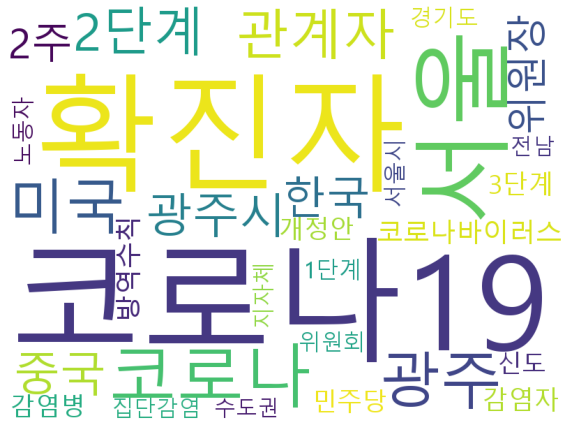

,0,기간
0,코로나19,기간_A
1,코로나19,기간_A
2,코로나19,기간_A
3,코로나19,기간_A
4,코로나19,기간_A
...,...,...
902,수도권,기간_A
903,수도권,기간_A
904,수도권,기간_A
905,수도권,기간_A



행정 분야의 청원 작성일 당일 부터 +30일까지(기간B) 283건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,코로나19,확진자,서울,미국,소모임,코로나,방역수칙,방역당국,광주,수도권,집단감염,관계자,코로나바이러스,이용자,한국
1,133,102,70,56,54,43,35,33,33,30,27,26,25,24,23


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,의무화,청와대,광주시,2단계,송파구,2주,공무원,서울시,중국,위원회,성가대,정은경,중대본,이라크,정규예배
1,23,23,20,19,19,18,18,18,17,17,17,16,16,16,16


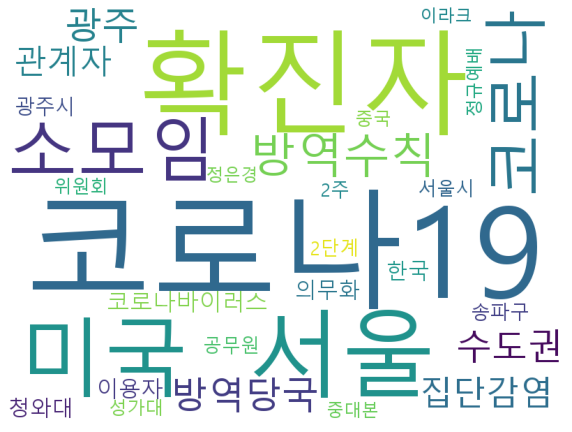

,0,기간
0,코로나19,기간_B
1,코로나19,기간_B
2,코로나19,기간_B
3,코로나19,기간_B
4,코로나19,기간_B
...,...,...
982,정규예배,기간_B
983,정규예배,기간_B
984,정규예배,기간_B
985,정규예배,기간_B



행정 분야의 청원 완료일 +1일 부터 +30일까지(기간C) 846건 워드클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,확진자,코로나19,서울,코로나,수도권,2단계,사랑제일교회,서울시,제일교회,광화문,인천,경기도,행정명령,광복절,종교시설
1,471,461,407,234,201,177,162,160,158,128,116,116,102,100,100


,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,2주,신도,집단감염,3단계,감염병,영상편집,코로나바이러스,온라인,방역당국,부산,관계자,방역수칙,전광훈,성북구,대구
1,94,92,92,92,91,87,83,81,79,78,76,72,62,61,60


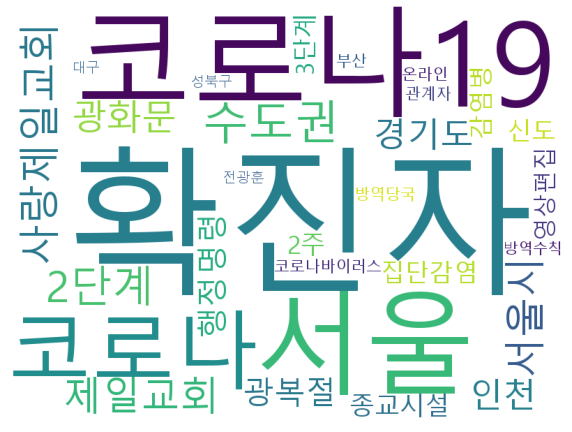

,0,기간
0,확진자,기간_C
1,확진자,기간_C
2,확진자,기간_C
3,확진자,기간_C
4,확진자,기간_C
...,...,...
4288,대구,기간_C
4289,대구,기간_C
4290,대구,기간_C
4291,대구,기간_C


,기간,0
0,기간_A,코로나19
1,기간_A,코로나19
2,기간_A,코로나19
3,기간_A,코로나19
4,기간_A,코로나19
...,...,...
4288,기간_C,대구
4289,기간_C,대구
4290,기간_C,대구
4291,기간_C,대구


In [17]:
# 행정
df2 = pd.read_excel('news_0908/행정_20200607-20200907.xlsx')
wc_0908(df,df2,"행정")